# Lab 2: Histogram in Image Processing
### 1. Objectives
By the end of this lab, students will be able to:
- Load images using OpenCV and display them.
- Convert images from color to grayscale and binary.
- Normalize pixel values to the range [0, 255].
- Understand and plot histograms using NumPy.
- Interpret the shape of histograms and their relation to image contrast.
### 2. Required Libraries
- **OpenCV**: Reading and basic image operations
- **Numpy**: Pixel-level math and histogram bins
- **Matplotlib**: Image and histogram visualization
```bash
        pip install ipykernel opencv-python numpy matplotlib 
```
### 3. Submission Guidelines:
- **File Format:** Ensure your submission is a Jupyter Notebook file.
- **File Naming Convention:** Rename your lab file in the following format:
    - Lab2_StudentFullName_StudentID.ipynb
- **Submission:** Please submit the zip file of Jupyter Notebook file to Moodle after you have completed.
    - Lab2_StudentFullName_StudentID.zip


In [ ]:
pip install ipykernel opencv-python numpy matplotlib 

#### Import required libraries

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Assignment 1: Load images
##### 1.1 Load image
**Explanation**: Use `cv2.imread(path_to_image)` to load image.

In [ ]:
# TODO: cv2.imread(path)
def load_image(path):
    img = cv2.imread(path)
    return img


##### 1.2 Convert color to Grayscale
**Explanation**: Use `cv2.cvtColor()` to convert color system to Grayscale

In [ ]:
# TODO: create a function to convert an image to grayscale
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# TODO: create a function to convert an image to binary
def convert_to_binary(image, threshold=127):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image_binary = image
    image_binary[gray < threshold] = 0
    image_binary[gray >= threshold] = 255
    return image_binary

##### 1.3 Show image
**Explanation**: Use `plt` to show image

In [ ]:
# TODO: create a function to show an image
def show_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

**Correctness Verification**:

In [ ]:
# Load original image (BGR)
img_bgr = load_image('image.png')
show_image(img_bgr, title='Original Image')

# Convert to grayscale from BGR (not from RGB)
gray_img = convert_to_grayscale(img_bgr)
show_image(gray_img, title='Grayscale Image')

# Convert to binary from BGR (not from RGB)
binary_img = convert_to_binary(img_bgr)
show_image(binary_img, title='Binary Image')

#### Assignment 2: Convert the image to grayscale, them, normalize pixel values to the range [0, 255] manually

In [ ]:
# TODO: convert the grayscale image to normalized pixel values in the range [0, 255]
def normalize_image(image):
    image = image.astype(np.float32)
    min_val = image.min()
    max_val = image.max()
    if max_val - min_val == 0:
        return np.zeros_like(image, dtype=np.uint8) 
    normalized = (image - min_val) / (max_val - min_val) * 255
    return normalized.astype(np.uint8)

**Correctness Verification**:

In [ ]:
img = load_image('image.png')
normalized_image = normalize_image(img)
show_image(normalized_image, title='Normalized Image')

gray_img = convert_to_grayscale(img)
show_image(gray_img, title='Grayscale Image')

#### Assignment 3. Histogram of GRAYSCALE and BINARY images
##### 3.1 Histogram of Grayscale images
##### 3.1.1 Manually
A **histogram** in image processing is a graphical representation of the distribution of pixel intensity values. For a grayscale image, which consists of intensity levels from 0 (black) to 255 (white), the histogram shows how many pixels fall into each intensity level.

![Alt text](./histogram.png)

Histograms are essential for tasks like contrast enhancement, thresholding, and image equalization.


In [ ]:
# TODO: count the number of pixels that are equal to the value range [0, 255] to create a histogram
def histogram_grayscale(image):
    hist = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        hist[pixel] += 1

    plt.figure(figsize=(10, 4))
    plt.bar(range(256), hist)
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Intensity (0–255)')
    plt.ylabel('Number of Pixels')
    plt.grid(True)
    plt.show()


**Correctness Verification**:

In [ ]:
image = load_image('color.png')
image = convert_to_grayscale(image)
show_image(image, title='Grayscale Image')
histogram_grayscale(image)

##### 3.1.2 Use libraries
**Explanation**: Use `hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])` to count the frequency. Then, use `plt` to visualize the histogram.

In [ ]:
# TODO: create a function to display a histogram of grayscale images using np.histogram function
def histogram_gray(image):
    pixel_values = image.flatten()
    histogram, _ = np.histogram(pixel_values, bins=256, range=(0, 255))
    
    plt.figure(figsize=(10, 5))
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.bar(range(256), histogram, width=1, color='black')
    plt.show()

In [ ]:
img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# 2. Tính histogram
hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))

# 3. Tạo lại ảnh giả từ histogram
def histogram_to_image(hist, shape):
    total_pixels = shape[0] * shape[1]
    pixel_values = []
    
    for intensity, count in enumerate(hist):
        pixel_values.extend([intensity] * count)
    
    # Cắt hoặc thêm 0 nếu thiếu
    pixel_values = (pixel_values + [0] * total_pixels)[:total_pixels]
    return np.array(pixel_values, dtype=np.uint8).reshape(shape)

fake_img = histogram_to_image(hist, img.shape)

# 4. Hiển thị kết quả
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Ảnh gốc")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Ảnh từ Histogram")
plt.imshow(fake_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Histogram ảnh gốc")
plt.bar(range(256), hist, width=1, color='black')

plt.tight_layout()
plt.show()


**Correctness Verification**:

In [ ]:
image = load_image('grayscale.png')
image = convert_to_grayscale(image)
show_image(image, title='Grayscale Image')
histogram_gray(image)

##### 3.2 Histogram of Binary images

In Binary image:
- 0 for Black
- 1 for White

![Alt text](https://ugc.futurelearn.com/uploads/images/ce/2d/large_hero_ce2d9a8a-2a10-4825-8b98-49bdbc67b4b5.jpg)

##### 3.2.1 Manually
**Explanation**: Use `np.sum(image==value)` to count the frequency of values. Then, use `plt` to visualize the histogram.

In [ ]:
# TODO: count the number of pixels that are equal to the values 0 and 255 to create a histogram for binary images
def binary_histogram(image):
    count_0 = np.sum(image == 0)
    count_255 = np.sum(image == 255)

    plt.bar([0, 255], [count_0, count_255], color='black', width=50)
    plt.title('Binary Histogram (Manual)')
    plt.xlabel('Pixel Value (0 or 255)')
    plt.ylabel('Frequency')
    plt.xticks([0, 255])
    plt.show()

**Correctness Verification**:

In [ ]:
image = load_image('color.png')
image = convert_to_binary(image)
show_image(image, title='Binary Image')
binary_histogram(image)

##### 3.2.2 Use libraries
**Explanation**: Use `hist, bins = np.histogram(image.flatten(), bins=2, range=[0, 256])` to count the frequency. Then, use `plt` to visualize the histogram.

In [ ]:
# TODO: count the number of pixels that are equal to the values 0 and 255 to create a histogram for binary images
# using np.histogram function
def binary_hist(image):
    pixel_values = image.flatten()
    histogram, _ = np.histogram(pixel_values, bins=2, range=(0, 255))
    
    plt.figure(figsize=(10, 5))
    plt.title('Binary Histogram')
    plt.xlabel('Pixel Value (0 or 255)')
    plt.ylabel('Frequency')
    plt.bar([0, 255], histogram, width=50, color='black')
    plt.xticks([0, 255])
    plt.show()

**Correctness Verification**:

In [ ]:
image = load_image('color.png')
image = convert_to_binary(image)
show_image(image, title='Binary Image')
binary_hist(image)

##### Assigment 4: Brightness

##### 4.1 Compute the brightness of an image
**Explanation**: 
The **brightness** of an image refers to the overall lightness or darkness perceived in the image, which is typically quantified by the average intensity of its pixels. In a grayscale image, pixel intensity values range from 0 (black) to 255 (white). A higher average pixel value indicates a brighter image.

To compute the brightness, you can use the mean of all pixel values. In Python, this can be done efficiently using NumPy: np.mean(image)


In [ ]:
# TODO: create a function to calculate the brightness of an image using the mean pixel value
def brightness(image):
   return np.mean(image)

**Correctness Verification**:

In [ ]:
image = load_image('color.png')
image = convert_to_grayscale(image)
show_image(image, title='Binary Image')
brightness_value = brightness(image)
print("Brightness of the image:", brightness_value)

In [ ]:
image = load_image('color.png')
image = convert_to_binary(image)
show_image(image, title='Binary Image')
brightness_value = brightness(image)
print("Brightness of the image:", brightness_value)

##### 4.2 Increase the brightness of an image

To increase the **brightness** of a grayscale image, you can simply add a constant value to each pixel. This shifts all intensity values upward, making the image appear lighter. However, pixel values in an 8-bit image must remain within the valid range of **[0, 255]**. Without proper handling, adding brightness may cause values to exceed 255, leading to **overflow artifacts** or wrapping around to low values.

To avoid this, we use `numpy.clip`, which limits the pixel values to stay within a specified range:

```python
brighter_image = np.clip(image.astype(np.int16) + value, 0, 255).astype(np.uint8)
```

- `image.astype(np.int16)` converts the image to a higher bit depth to prevent overflow during addition.
- `value` is the amount by which to increase brightness (e.g., 30).
- `np.clip(..., 0, 255)` ensures the result stays within the valid intensity range.
- `.astype(np.uint8)` converts the result back to 8-bit format if necessary.

In [ ]:
# TODO: create a function to increase the brightness of an image
def increase_brightness(image, value=30):
    return np.clip(image.astype(np.int16) + value, 0, 255).astype(np.uint8)

**Correctness Verification**:

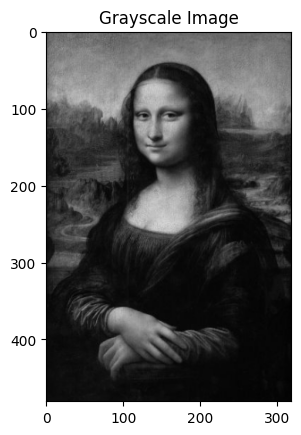

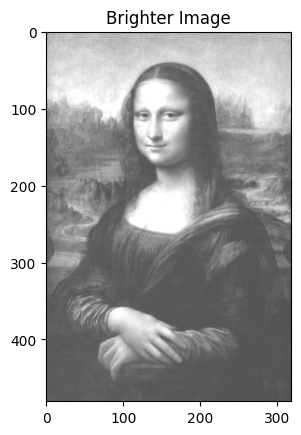

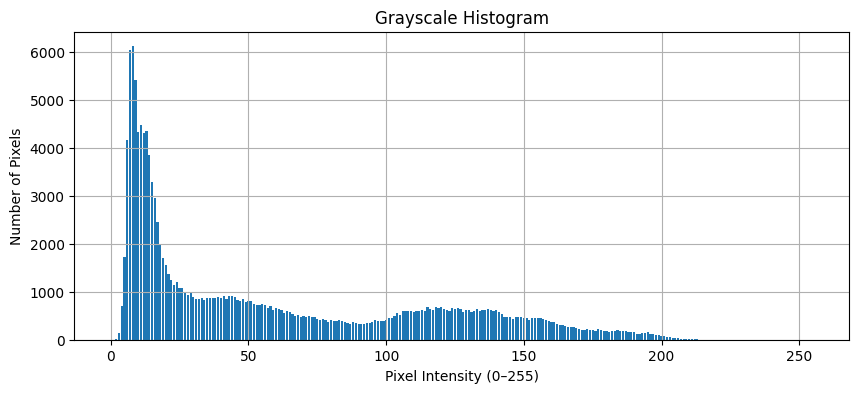

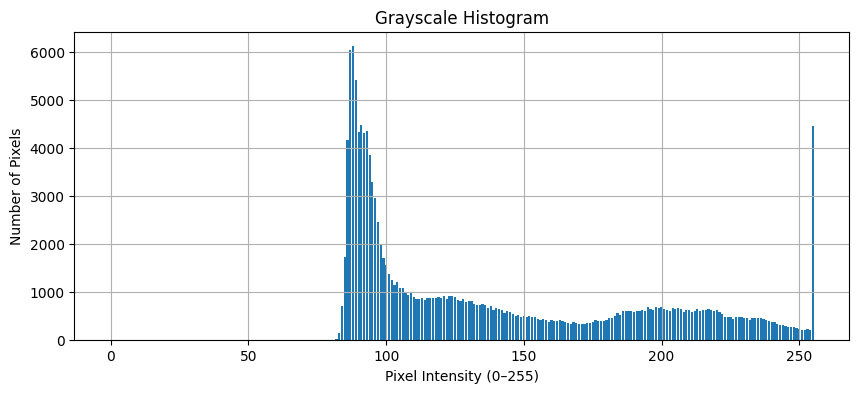

In [79]:
image = load_image('color.png')
image = convert_to_grayscale(image)
show_image(image, title='Grayscale Image')

brighter = increase_brightness(image, 80)
show_image(brighter, title='Brighter Image')

histogram_grayscale(image)
histogram_grayscale(brighter)

##### 4.3 Decrease the brightness of an image
To decrease the brightness of a grayscale image, you can subtract a constant value from each pixel. This lowers all intensity values, making the image appear darker. However, in an 8-bit image, pixel values must stay within the valid range of [0, 255]. Subtracting brightness without caution can cause values to fall below 0, resulting in underflow artifacts where values wrap around to high intensities.

To prevent this, we use:
```python
darker_image = np.clip(image.astype(np.int16) - value, 0, 255).astype(np.uint8)
```

- `image.astype(np.int16)` converts the image to a higher bit depth to prevent underflow during subtraction.
- `value` is the amount by which to decrease brightness (e.g., 50).
- `np.clip(..., 0, 255)` ensures the result stays within the valid intensity range.
- `.astype(np.uint8)` converts the result back to 8-bit format if necessary.

In [77]:
# TODO: create a function to decrease the brightness of an image
def decrease_brightness(image, value=50):
    return np.clip(image.astype(np.int16) - value, 0, 255).astype(np.uint8)

**Correctness Verification**:

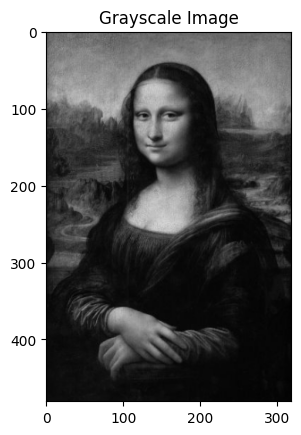

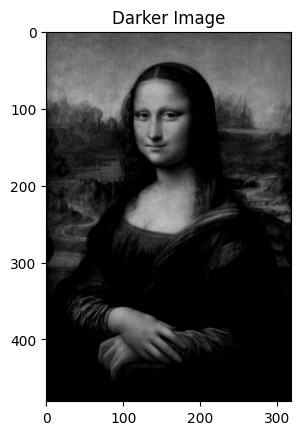

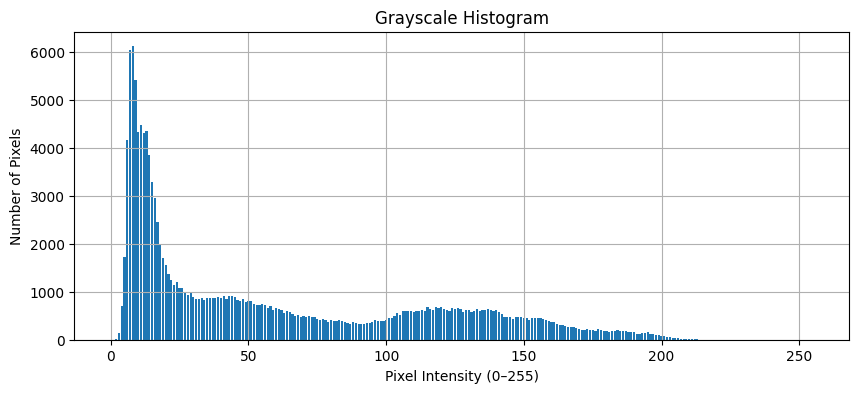

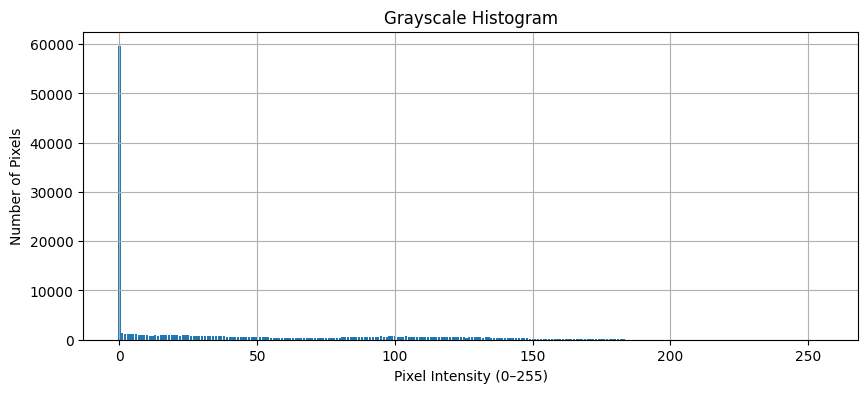

Number of pixels of zero in the darker image: 59545


In [78]:
image = load_image('color.png')
image = convert_to_grayscale(image)
show_image(image, title='Grayscale Image')

darker = decrease_brightness(image, 20)
show_image(darker, title='Darker Image')

histogram_grayscale(image)
histogram_grayscale(darker)

print("Number of pixels of zero in the darker image:", np.sum(darker == 0))

##### Assignment 5: Contrast
##### 5.1 Michelson Contrast
**Explanation**: Michelson contrast is a measure of contrast that is commonly used for periodic patterns, such as sinusoidal gratings. It is defined as the ratio of the difference between the maximum and minimum luminance (or intensity) to their sum. The formula for Michelson contrast is:

$$ C_m = \frac{I_{max} - I_{min}}{I_{max} + I_{min}} $$

Where $I_{max}$ is the maximum intensity and $I_{min}$ is the minimum intensity in the image or region of interest. The value ranges from 0 to 1, where 0 indicates no contrast (uniform image) and 1 indicates maximum contrast (e.g., black and white image).

In [ ]:
# TODO: create a function to calculate the Michelson contrast of an image
def michelson_contrast(image):

    min_val = np.min(image).astype(np.float64) 
    max_val = np.max(image).astype(np.float64) 
    if (max_val + min_val) == 0:
        return 0.0
    contrast = (max_val - min_val) / (max_val + min_val)
    return contrast 

**Correctness Verification**:

In [ ]:
image = load_image('image.png')
image = convert_to_grayscale(image)
image_contrast = michelson_contrast(image)
print(image_contrast)

##### 5.2 Weber Contrast
**Explanation**: Weber contrast is typically used to describe the contrast of a small feature or object against a uniform background. It is defined as the ratio of the difference between the luminance of the object ($I_o$) and the background ($I_b$) to the background luminance. The formula for Weber contrast is:

$$ C_w = \frac{I_o - I_b}{I_b} $$

Where $I_o$ is the intensity of the object and $I_b$ is the intensity of the background. A common application of Weber contrast is in text readability, where the text is the object and the page is the background. Positive values indicate that the object is brighter than the background, while negative values indicate it's darker. This measure is more appropriate when there's a distinct background.

In [ ]:

# For a whole image, we can consider the background to be the average intensity
# and the object to be the maximum intensity, or some other representative values.
# A more precise Weber contrast would require defining foreground/background regions.
# Here, we'll use max intensity as object and mean as background for a general image.

# TODO: create a function to calculate the Weber contrast of an image
# using np.mean and np.max to find the mean and maximum pixel values
def weber_contrast(image):
    mean_val = np.mean(image).astype(np.float64) 
    max_val = np.max(image).astype(np.float64) 
    if mean_val == 0:
        return 0.0
    contrast = (max_val - mean_val) / mean_val
    return contrast

**Correctness Verification**:

In [ ]:
image = load_image('image.png')
image = convert_to_grayscale(image)
image_contrast = weber_contrast(image)
print(image_contrast)

##### 5.3 Standard Deviation: Độ lệch chuẩn
**Explanation**: Standard deviation is a statistical measure that quantifies the amount of variation or dispersion of a set of data values. In the context of images, the standard deviation of pixel intensities is often used as a simple measure of overall image contrast. A higher standard deviation indicates a wider range of pixel intensities, suggesting higher contrast, while a lower standard deviation suggests a more uniform image with lower contrast. It's a general measure and doesn't distinguish between foreground and background, but it provides a good indication of the overall dynamic range of the image.

The formula for standard deviation ($\sigma$) for a set of pixel intensities ($x_i$) with mean ($\mu$) and N pixels is:

$$ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 } $$

In [ ]:
# TODO: create a function to calculate the standard deviation constrast of an image
def stdev_constrast(image):
    mean_val = np.mean(image).astype(np.float64) 
    std_dev = np.std(image).astype(np.float64) 
    if mean_val == 0:
        return 0.0
    contrast = std_dev / mean_val
    return contrast

**Correctness Verification**:

In [ ]:
image = load_image('image.png')
image = convert_to_grayscale(image)
image_contrast = stdev_constrast(image)
print(image_contrast)

##### Assignment 6: Histogram of color image

#### 6.1 Manually

A histogram represents the distribution of pixel intensities. For color images, we calculate one histogram per channel (Red, Green, Blue).
To do this manually:
- Loop through all pixels.
- Count occurrences of each intensity value (0–255) for each channel.


In [ ]:
# TODO: create a function to calculate the RGB histogram of an image manually
def manual_rgb_histogram(image):
    hist_r = np.zeros(256, dtype=int)
    hist_g = np.zeros(256, dtype=int)
    hist_b = np.zeros(256, dtype=int)

    for pixel in image.reshape(-1, 3):
        r, g, b = pixel
        hist_r[r] += 1
        hist_g[g] += 1
        hist_b[b] += 1

    return hist_r, hist_g, hist_b

**Correctness Verification**:

In [ ]:
img = load_image('image.png')
show_image(img, title='Original Image')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r_hist, g_hist, b_hist = manual_rgb_histogram(img_rgb)

plt.plot(r_hist, color='r')
plt.plot(g_hist, color='g')
plt.plot(b_hist, color='b')
plt.title('Manual RGB Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 6.2 Use Libraries

OpenCV provides `cv2.calcHist()` which computes histograms more efficiently.
This simplifies the process, and allows masking and tuning of histogram parameters.

`cv2.calcHist(images, channels, mask, histSize, ranges)`

- **images**: List of images (e.g., `[img]`)
- **channels**: Channel index (0 for Blue, 1 for Green, 2 for Red in OpenCV)
- **mask**: Optional mask (use `None` for full image)
- **histSize**: Number of bins (e.g., `[256]` for 256 bins)
- **ranges**: Range of values (e.g., `[0, 256]`)

In [80]:
# TODO: create a function to calculate the RGB histogram of an image using OpenCV
# using cv2.calcHist function
def library_rgb_histogram(image):
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

    return hist_r.flatten(), hist_g.flatten(), hist_b.flatten()

**Correctness Verification**:

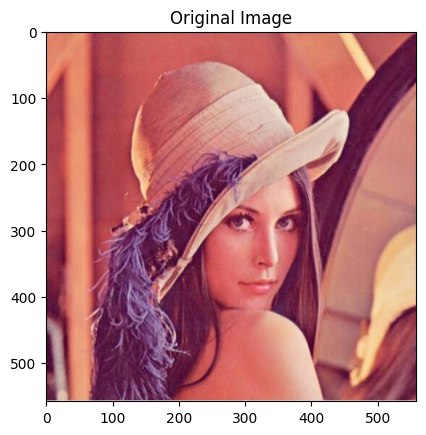

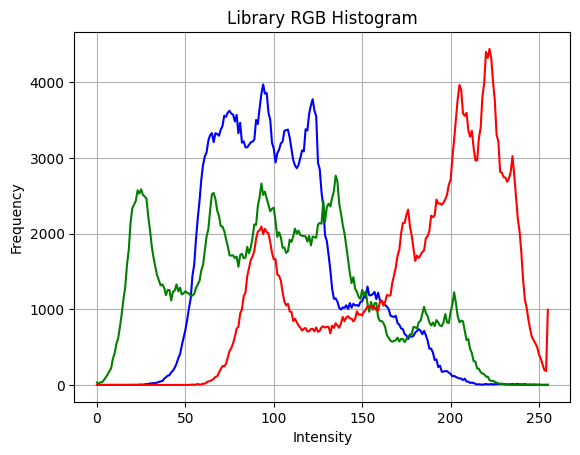

In [81]:
img = load_image('image.png')
show_image(img, title='Original Image')
hist_bgr = library_rgb_histogram(img)

for hist, color in zip(hist_bgr, ('b', 'g', 'r')):
    plt.plot(hist, color=color)
plt.title('Library RGB Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 6.3 Perceptual Brightness: độ sáng mà mắt người cảm nhận được

Brightness is the perceived luminance of an image.
One common model uses the formula:
`Brightness = 0.299*R + 0.587*G + 0.114*B`
This accounts for human sensitivity to green more than red or blue.

In [ ]:
# TODO: create a function to calculate the perceptual brightness of an image
# using the formula: brightness = 0.299 * R + 0.587 * G + 0.114 * B
def calculate_brightness(image):
    if len(image.shape) == 2:  
        return np.mean(image)
    elif len(image.shape) == 3:  
        r, g, b = cv2.split(image)
        brightness = 0.299 * r + 0.587 * g + 0.114 * b
        return np.mean(brightness)
    else:
        raise ValueError("Unsupported image format")

**Correctness Verification**:

In [ ]:
img = load_image('image.png')
show_image(img, title='Original Image')
brightness = calculate_brightness(img)
print(f"Perceptual Brightness: {brightness:.2f}")

#### 6.4 Contrast

Contrast refers to the range of brightness levels. It's typically measured as the standard deviation of luminance.
Higher contrast means more variation between bright and dark regions.

In [ ]:
# TODO: create a function to calculate the contrast of an image
# using the standard deviation of the luminance channel
def calculate_contrast(image):
    if len(image.shape) == 2:  
        return np.std(image)
    elif len(image.shape) == 3:  
        r, g, b = cv2.split(image)
        luminance = 0.299 * r + 0.587 * g + 0.114 * b
        return np.std(luminance)
    else:
        raise ValueError("Unsupported image format")

**Correctness Verification**:

In [ ]:
img = load_image('image.png')
show_image(img, title='Original Image')
contrast = calculate_contrast(img)
print(f"Image Contrast: {contrast:.2f}")